In [1]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab



In [2]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')

data_10_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_10_n_20yr.nc')
data_10_s = data_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

data_10_both=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_10/CESM_output_data/atm/hist/*")
data_10_last18_both=data_10_both[24:240] # Get years 3-20
data_10_data_both = xr.open_mfdataset(data_10_last18_both,combine="by_coords",use_cftime=True)
data_10 = data_10_data_both.mean('time') # Average over the last 18 years


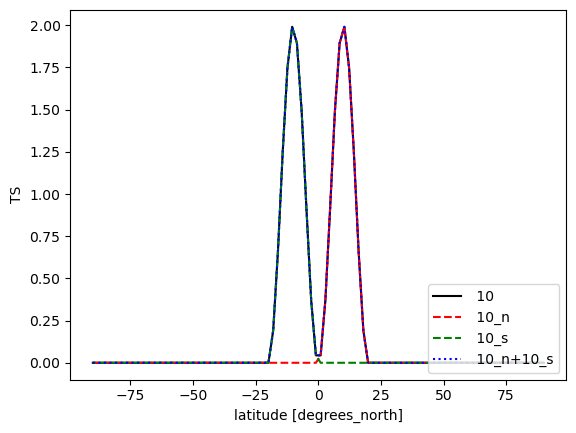

In [6]:
#surface_t2 = surface_t_2.mean('lon')
surface_t1 = data_10.TS.mean('lon')-data_control.TS.mean('lon')
surface_t1.plot(color="black",label=" 10")

surface_t2 = data_10_n.TS.mean('lon')-data_control.TS.mean('lon')
surface_t2.plot(color="red",label=" 10_n",linestyle='dashed')

#plt.plot(x,y,color="green")
surface_t3 =  data_10_s.TS.mean('lon')-data_control.TS.mean('lon')
surface_t3.plot(color="green",label=" 10_s",linestyle='dashed')

surface_t4 =  surface_t2+surface_t3
surface_t4.plot(color="blue",label=" 10_n+10_s",linestyle='dotted')
#surface_t2.plot(label="Result of prescribed SST--equatorial band")
plt.legend(loc='lower right')

In [5]:
TOA_flux_exp_minus_control_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_10_s = (data_10_s.FSNT.mean('lon')-data_10_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_10 =(data_10.FSNT.mean('lon')-data_10.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


TOA_flux_exp_minus_control_10_ns=TOA_flux_exp_minus_control_10_n+TOA_flux_exp_minus_control_10_s

pp_10_ns=np.array(TOA_flux_exp_minus_control_10_ns)
#zp= pp.transpose()
exp_10_ns=np.linspace(0,1,96)
plat_10_ns=np.array(TOA_flux_exp_minus_control_10_ns.lat)
expp_10_ns, ppp_10_ns=np.meshgrid(exp_10_ns, pp_10_ns)

pp_10=np.array(TOA_flux_exp_minus_control_10)
#zp= pp.transpose()
exp_10=np.linspace(0,1,96)
plat_10=np.array(TOA_flux_exp_minus_control_10.lat)
expp_10, ppp_10=np.meshgrid(exp_10, pp_10)

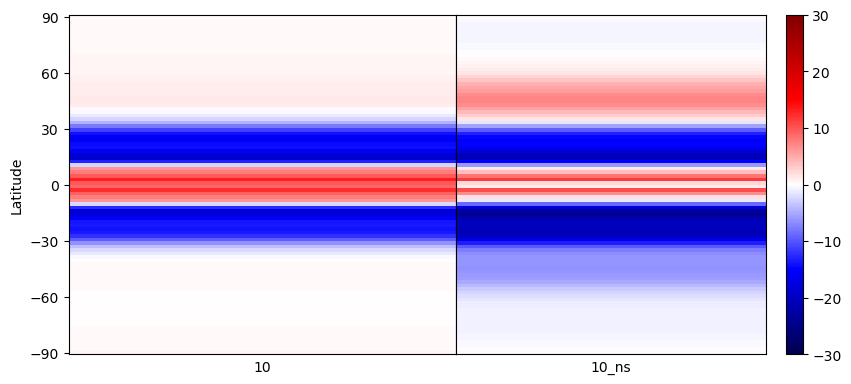

In [6]:

nrow = 1
ncol = 3
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_10,plat_10,ppp_10,cmap='seismic',vmax=vmax, vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("10")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_10_ns,plat_10_ns,ppp_10_ns,cmap='seismic',vmax=vmax, vmin=vmin)
plt.xticks([])
plt.xlabel("10_ns")
ax = pylab.gca()
ax.yaxis.set_visible(False)



# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,8])
plt.colorbar(shrink=1)
plt.show()

In [12]:
TOA_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_10_s = (data_10_s.FSNT.mean('lon')-data_10_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_10_ns=TOA_10_n+TOA_10_s
TOA_10 = (data_10.FSNT.mean('lon')-data_10.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


Text(0.5, 1.0, 'TOA flux')

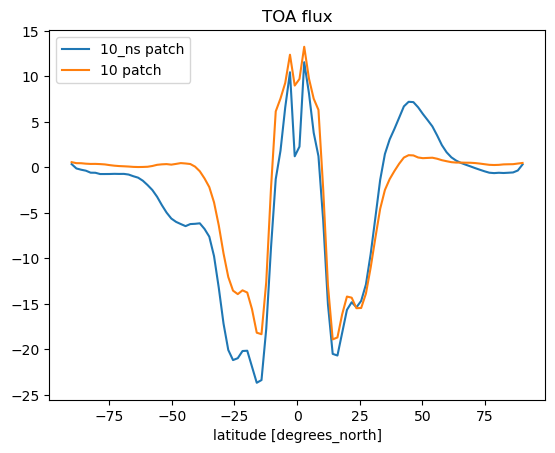

In [13]:

TOA_10_ns.plot( label='10_ns patch')
TOA_10.plot( label='10 patch')

plt.legend(loc='upper left')
plt.title('TOA flux')

In [14]:
Qs_10_n=(-data_10_n.FLNS.mean('lon')+data_10_n.FSNS.mean('lon')-data_10_n.SHFLX.mean('lon')-data_10_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_10_s=(-data_10_s.FLNS.mean('lon')+data_10_s.FSNS.mean('lon')-data_10_s.SHFLX.mean('lon')-data_10_s.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))

Qs_10_ns=Qs_10_n+Qs_10_s
Qs_10=(-data_10.FLNS.mean('lon')+data_10.FSNS.mean('lon')-data_10.SHFLX.mean('lon')-data_10.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))


Text(0.5, 1.0, 'Qs')

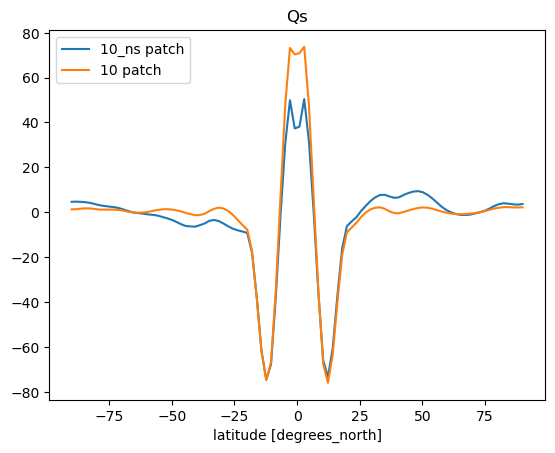

In [15]:
Qs_10_ns.plot( label='10_ns patch')
Qs_10.plot( label='10 patch')

plt.legend(loc='upper left')
plt.title('Qs')

In [16]:
Qa_10_n=Qs_10_n-TOA_10_n
Qa_10_s=Qs_10_s-TOA_10_s

Qa_10_ns=Qa_10_n+Qa_10_s
Qa_10=Qs_10-TOA_10

Text(0.5, 1.0, 'Qa')

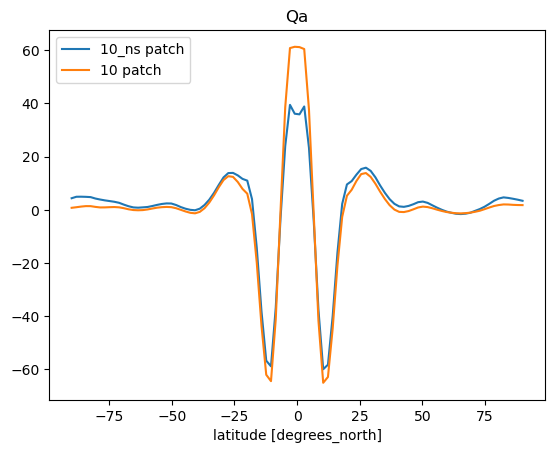

In [17]:
Qa_10_ns.plot( label='10_ns patch')
Qa_10.plot( label='10 patch')

plt.legend(loc='upper left')
plt.title('Qa')

In [18]:
T_10_n=data_10_n.T.mean('lon')-data_control.T.mean('lon')
T_10_s=data_10_s.T.mean('lon')-data_control.T.mean('lon')

T_10_ns=T_10_n+T_10_s
T_10=data_10.T.mean('lon')-data_control.T.mean('lon')


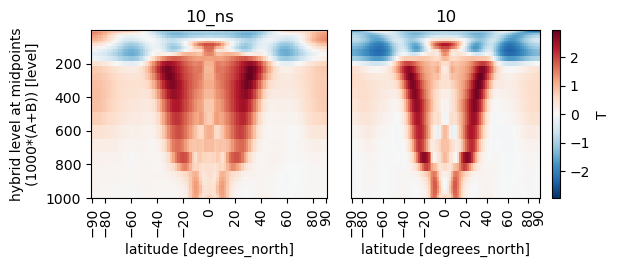

In [29]:
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1)

plt.subplot(gs[0,0])
T_10_ns.plot(yincrease=False, cmap='RdBu_r',add_colorbar=False)
#plt.yscale("log")
plt.title('10_ns')
ax = pylab.gca()
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.yticks([1000, 800, 600,400,200])
plt.xticks(rotation=90)

plt.subplot(gs[0,1])
T_10.plot(yincrease=False, cmap='RdBu_r')
#plt.yscale("log")
plt.title('10')
ax = pylab.gca()
ax.yaxis.set_visible(False)
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.xticks(rotation=90)

# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,6])
#plt.colorbar()
plt.show()


In [21]:
css_10_n=data_10_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_10_s=data_10_s.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

css_10_ns=css_10_n+css_10_s
css_10=data_10.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

csl_10_n=data_10_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_10_s=data_10_s.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

csl_10_ns=csl_10_n+csl_10_s
csl_10=data_10.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

ass_10_n=data_10_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_10_s=data_10_s.FSNT.mean('lon')-data_control.FSNT.mean('lon')

ass_10_ns=ass_10_n+ass_10_s
ass_10=data_10.FSNT.mean('lon')-data_control.FSNT.mean('lon')

asl_10_n=data_10_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_10_s=data_10_s.FLNT.mean('lon')-data_control.FLNT.mean('lon')

asl_10_ns=asl_10_n+asl_10_s
asl_10=data_10.FLNT.mean('lon')-data_control.FLNT.mean('lon')

CRES_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_10_s = (data_10_s.FSNT.mean('lon')-data_10_s.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CRES_10_ns=CRES_10_n+CRES_10_s
CRES_10 = (data_10.FSNT.mean('lon')-data_10.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CREL_10_n = (data_10_n.FLNT.mean('lon')-data_10_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_10_s = (data_10_s.FLNT.mean('lon')-data_10_s.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))

CREL_10_ns=CREL_10_n+CREL_10_s
CREL_10 = (data_10.FLNT.mean('lon')-data_10.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))


In [23]:
tcs_10_n=css_10_n-csl_10_n
tcs_10_s=css_10_s-csl_10_s

tcs_10_ns=tcs_10_n+tcs_10_s
tcs_10=css_10-csl_10

tas_10_n=ass_10_n-asl_10_n
tas_10_s=ass_10_s-asl_10_s

tas_10_ns=tas_10_n+tas_10_s
tas_10=ass_10-asl_10

tCRE_10_n=CRES_10_n-CREL_10_n
tCRE_10_s=CRES_10_s-CREL_10_s

tCRE_10_ns=tCRE_10_n+tCRE_10_s
tCRE_10=CRES_10-CREL_10



Text(0.5, 1.0, 'CRES')

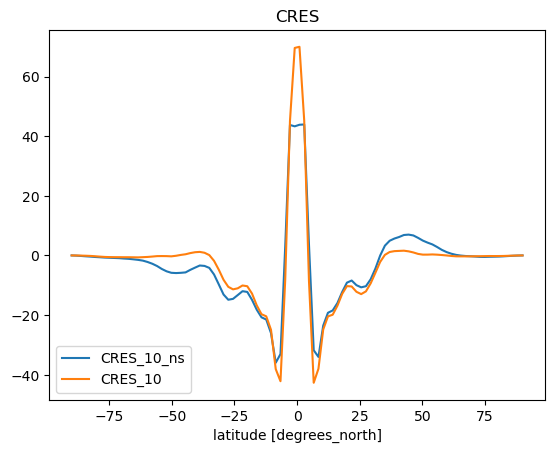

In [24]:


CRES_10_ns.plot(label='CRES_10_ns')
CRES_10.plot(label='CRES_10')


plt.legend(loc='lower left')
plt.title("CRES")

Text(0.5, 1.0, 'CREL')

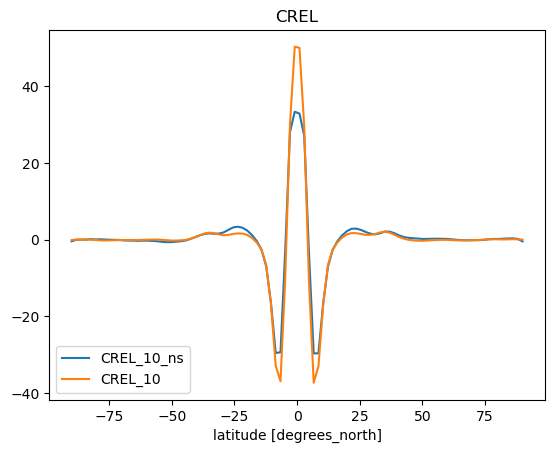

In [25]:
CREL_10_ns.plot(label='CREL_10_ns')
CREL_10.plot(label='CREL_10')


plt.legend(loc='lower left')
plt.title("CREL")

Text(0.5, 1.0, 'Total CRE')

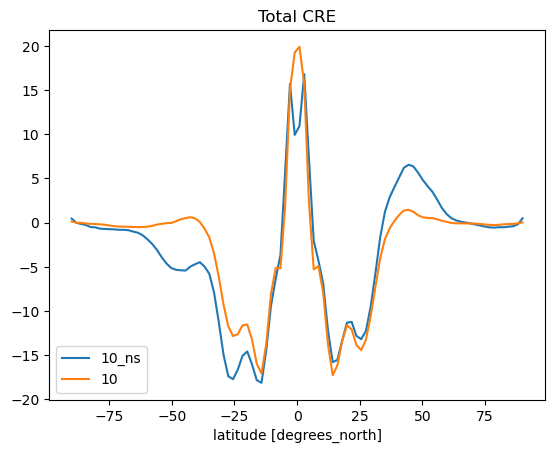

In [26]:
tCRE_10_ns.plot(label='10_ns')
tCRE_10.plot(label='10')


plt.legend(loc='lower left')
plt.title("Total CRE")

Text(0.5, 1.0, 'Total All Sky')

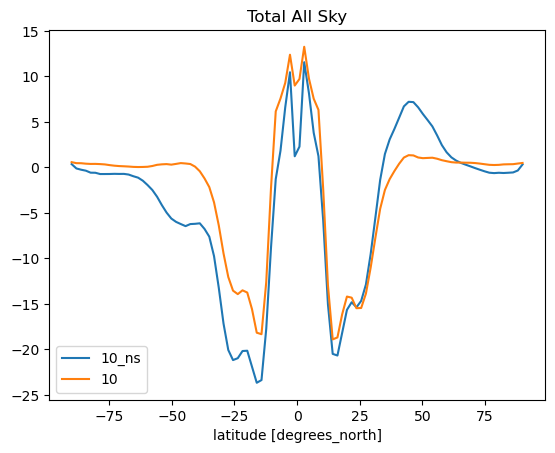

In [27]:
tas_10_ns.plot(label='10_ns')
tas_10.plot(label='10')


plt.legend(loc='lower left')
plt.title("Total All Sky")

Text(0.5, 1.0, 'Total Clear Sky')

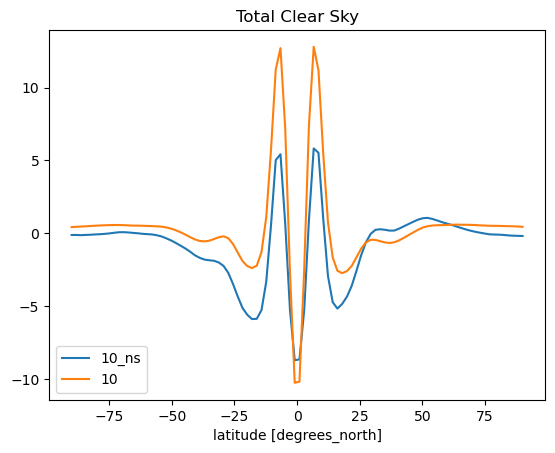

In [28]:
tcs_10_ns.plot(label='10_ns')
tcs_10.plot(label='10')


plt.legend(loc='lower left')
plt.title("Total Clear Sky")